# Coupled Harmonic Oscillator

Teng-Jui Lin

Content adapted from Mr. Ben Trey's [coupled harmonic oscillator internet](https://github.com/bentrey/Projects/blob/master/coupledHarmonicOscillatorInternet.ipynb). The application of `scipy.integrate.solve_ivp()` and phase portrait is related to UW AMATH 301, Beginning Scientific Computing.

- Phase portraits
  - Coupled harmonic oscillator
  - Coupled harmonic oscillator internet

## Coupled harmonic oscillator

**Problem Statement.** Consider a coupled harmonic oscillator with two blocks $m_1$ and $m_2$ attached with each other and two fixed walls with springs with spring constants $k_1, k_2, k_3$. It is supported by a smooth horizontal surface. The equilibrium length of the springs are $l_1, l_2, l_3$, and the distance between the two walls is $L$. The damping coefficient of each block is $c_1$ and $c_2$. The position of the blocks is $x_1$ and $x_2$ with origin at the equilibrium position of $m_1$ and $m_2$, respectively; the velocity of the blocks is $\dot{x}_1$ and $\dot{x}_2$; the acceleration of the blocks is $\ddot{x}_1$ and $\ddot{x}_2$. External forces on the blocks are $F_{\text{ext}, 1}$ and $F_{\text{ext}, 2}$. Define positive axis to the right.

Suppose $m_1$ is initially pulled away from its equilibrium position and released without external forces. Solve the position of the blocks $x_1$ and $x_2$ over time with the initial conditions $x_1(0) = -0.2 \ \mathrm{m}, x_2(0) = 0.2 \ \mathrm{m}, v_1(0) = 0, v_2(0) = 0$, provided the following system specifications:

- Masses: $m_1 = m_2 = 1 \ \mathrm{kg}$
- Spring constants: $k_1 = k_2 = k_3 = 100 \ \mathrm{N/m}$
- Equilibrium length of springs: $l_1 = l_2 = l_3 = 1 \ \mathrm{m}$
- Damping constants: $c_1 = c_2 = 3 \ \mathrm{kg/s}$

Deliverables:

- Generate a plot of $x_1(t)$ and $x_2(t)$ over time
- Generate an animation of the system

**Solution.** From the above specifications, we can get some additional information. Since we have no external forces, so we have $F_{\text{ext}, 1} = F_{\text{ext}, 2} = 0$. We assume the blocks are point masses, so the distance between the walls is $L = l_1 + l_2 + l_3 = 3 \ \mathrm{m}$.

Now, we analyze the forces on each block. The net vertical force is zero because gravitational force and the normal force cancels. Friction can be neglected because of smooth surface. We then look at the horizontal forces for $m_1$ and $m_2$.

For $m_1$, we have Newton's second law and the horizontal forces

$$
\begin{aligned}
\text{Newton's second law:} & &\sum F_1&=m_1\ddot{x}_1 \\
\text{Spring 1:} & &F_{\text{spring 1}}&=-k_1 x_1 \\
\text{Spring 2:} & &F_{\text{spring 2}}&=-k_2(x_1 - x_2) \\
\text{Damping:} & &F_{\text{damping}}&=-c_1\dot{x}_1 \\
\text{External:} & &F_{\text{ext,1}}&=0 \\
\end{aligned}
$$

which form the ODE

$$
\begin{aligned}
\sum F_1 &= F_{\text{spring 1}} + F_{\text{spring 2}} + F_{\text{damping}} + F_{\text{ext,1}} \\
m_1\ddot{x}_1 &= -k_1x_1 - k_2(x_1 - x_2) - c_1\dot{x}_1
\end{aligned}
$$

For $m_2$, we have Newton's second law and the horizontal forces

$$
\begin{aligned}
\text{Newton's second law:} & &\sum F_2&=m_2\ddot{x}_2 \\
\text{Spring 2:} & &F_{\text{spring 2}}&=-k_2(x_2 - x_1) \\
\text{Spring 3:} & &F_{\text{spring 3}}&=-k_3x_2 \\
\text{Damping:} & &F_{\text{damping}}&=-c_2\dot{x}_2 \\
\text{External:} & &F_{\text{ext,2}}&=0 \\
\end{aligned}
$$

which form the ODE

$$
\begin{aligned}
\sum F_2 &= F_{\text{spring 2}} + F_{\text{spring 3}} + F_{\text{damping}} + F_{\text{ext,2}} \\
m_2\ddot{x}_2 &= -k_2(x_2 - x_1) - k_3x_2 - c_2\dot{x}_2
\end{aligned}
$$

The above two ODEs are coupled system of linear second-order ODEs. They can be written into a system of

$$
\begin{cases}
\dot{x}_1 = v_1 \\
\dot{v}_1 = \dfrac{-k_1x_1 - k_2(x_1 - x_2) - c_1\dot{x}_1}{m_1} \\
\dot{x}_2 = v_2 \\
\dot{v}_2 = \dfrac{-k_2(x_2 - x_1) - k_3x_2 - c_2\dot{x}_2}{m_2}
\end{cases}
$$

that can be solved by `scipy.integrate.solve_ivp()`.

### Solve the system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
from scipy import integrate

In [2]:
# model params
m1 = 1  # kg
m2 = 1  # kg
k1 = 100  # N/m
k2 = 100  # N/m
k3 = 100  # N/m
c1 = 3  # kg/s
c2 = 3  # kg/s
l1 = 1  # m
l2 = 1  # m
l3 = 1  # m

In [3]:
# time array
t_initial = 0
t_final = 2
t = np.linspace(t_initial, t_final, 1000)
t_len = len(t)

In [4]:
# initial values (x is relative to eqm length)
x1_init = -0.2
v1_init = 0
x2_init = 0.2
v2_init = 0
initial_values = [x1_init, v1_init, x2_init, v2_init]

In [5]:
# external forces
F1 = lambda t : 0
F2 = lambda t : 0

In [6]:
# def F1(t):
#     '''External force on m1.'''
#     omega = 100
#     A = np.sqrt(k1 + k2)+1000
#     phi = 1
#     return A*np.sin(omega*t + phi)

In [7]:
# def F1(t):
#     if(int(t/3)%2 == 0):
#         omega = 1e4
#     else:
#         omega = np.sqrt(k1 + k2)
#     A = 20
#     phi = 1
#     return A*np.sin(omega*t + phi)

In [8]:
## equivalent, simpler form for coupled ode systems
## note: this form not convenient for phase portrait
def coupled_ode_syst(t, Y):
    # t -> independent variable
    # Y -> functions evaluated at independent variable
    x1, v1, x2, v2 = Y
    derivatives = np.array([
        v1,
        (-k1*x1 - k2*(x1 - x2) - c1*v1 + F1(t))/m1,
        v2,
        (-k2*(x2 - x1) - k3*x2 - c2*v2 + F2(t))/m2,
    ])
    return derivatives

In [9]:
ode_soln = scipy.integrate.solve_ivp(coupled_ode_syst, [t_initial, t_final], initial_values, t_eval=t).y
x1, v1, x2, v2 = ode_soln

### Position plot

In [10]:
def custom_plot_settings():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

    plt.rcParams.update({
        'font.family': 'Arial',  # Times New Roman, Calibri
        'font.weight': 'normal',
        'mathtext.fontset': 'cm',
        'font.size': 18,

        'lines.linewidth': 2,

        'axes.linewidth': 2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',

        'xtick.major.size': 8,
        'xtick.major.width': 2,
        'ytick.major.size': 8,
        'ytick.major.width': 2,

        'figure.dpi': 80,
        'savefig.dpi': 300,

        'legend.framealpha': 1, 
        'legend.edgecolor': 'black',
        'legend.fancybox': False,
        'legend.fontsize': 14,

        'animation.html': 'html5',
    })

custom_plot_settings()

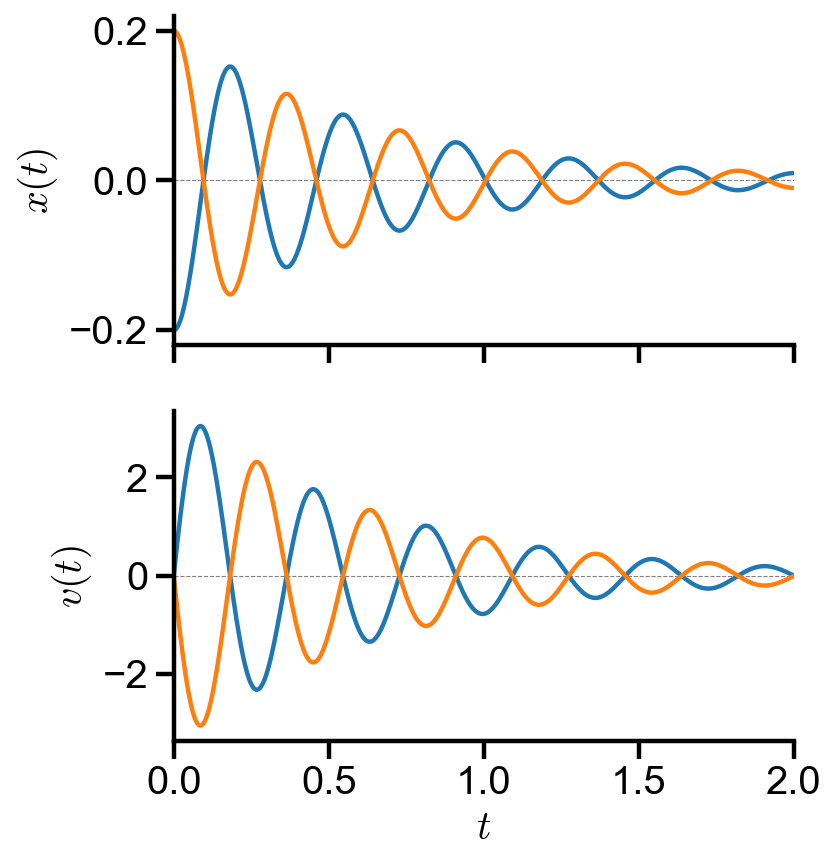

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex=True)
axs[0].plot(t, x1, label='$x_1(t)$')
axs[0].plot(t, x2, label='$x_2(t)$')
axs[0].set_ylabel('$x(t)$')
# axs[0].set_ylim(0.5, 2.5)

axs[1].plot(t, v1, label='$v_1(t)$')
axs[1].plot(t, v2, label='$v_2(t)$')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$v(t)$')
# axs[1].set_ylim(-3.5, 3.5)

for i in range(2):
    axs[i].set_xlim(t_initial, t_final)
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref

### Animation of the system

Note on animation: for local reproducible results, [download ffmpeg and add to path variable](https://www.thewindowsclub.com/how-to-install-ffmpeg-on-windows-10). For reproducible results online, use Google Colab and run the command below.

In [ ]:
# Run the command in Google Colab for reproducible results online
# !apt install ffmpeg

In [12]:
def spring_xy(left_bound, right_bound, vertical_shift=0.25, harmonic=15, amplitude=0.1):
    '''
    Returns array of x and y coordinates of spring animation object
    as a standing wave with wave function 
        y = A sin(2pi(x-x0)/lambda) + b 
    where 
        lambda = 2L/n
    '''
    interval_len = right_bound - left_bound
    wave_len = 2*(interval_len)/harmonic
    spring_x = np.linspace(left_bound, right_bound, 100)
    spring_y = amplitude*np.sin(2*np.pi*(spring_x - left_bound)/wave_len) + vertical_shift
    return np.array([spring_x, spring_y])

In [13]:
# animation object params
block_width = 0
block_height = 0.5
block_center_offset = block_width / 2

wall1_x = 0
block1_eqm_x = wall1_x + l1
block2_eqm_x = block1_eqm_x + l2
wall2_x = block2_eqm_x + l3

In [14]:
# ## interactive plot 
# ## uncomment for testing
# ## used for checking time series before making animation
# ## can be used to test all animation below

# # plot settings
# custom_plot_settings()
# %matplotlib qt

# # plot static portion
# fig, ax = plt.subplots(figsize=(5, 2))
# ax.set_xlim(wall1_x, wall2_x)
# ax.set_ylim(0, 1)
# ax.spines['right'].set_visible(True)
# plt.tight_layout()

# # plot empty framework
# block1 = ax.add_patch(patches.Rectangle((block1_eqm_x+block_center_offset, 0), block_width, block_height, fill=False, color='black', zorder=10, lw=2)) 
# block2 = ax.add_patch(patches.Rectangle((block2_eqm_x+block_center_offset, 0), block_width, block_height, fill=False, color='black', zorder=10, lw=2)) 
# spring1, = ax.plot([], [], color='black')
# spring2, = ax.plot([], [], color='purple')
# spring3, = ax.plot([], [], color='black')
# title = ax.set_title('')

# # animation parameters
# t_range = t_len  # manually set t range, default t_len
# anim_time = 10  # s
# fps = 60
# frame_num = int(fps * anim_time)

# # update changes each frame
# for n in range(frame_num):
#     time_points = round(t_range/frame_num)
#     frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
#     title.set_text(f't = {t[frame_final_time] :.2f}')
#     # spring 1
#     left_bound = wall1_x
#     right_bound = block1_eqm_x + x1[frame_final_time] - block_center_offset
#     spring1.set_data(*spring_xy(left_bound, right_bound))
#     # spring 2
#     left_bound = block1_eqm_x + x1[frame_final_time] + block_center_offset
#     right_bound = block2_eqm_x + x2[frame_final_time] - block_center_offset
#     spring2.set_data(*spring_xy(left_bound, right_bound))
#     # spring 3
#     left_bound = block2_eqm_x + x2[frame_final_time] + block_center_offset
#     right_bound = wall2_x
#     spring3.set_data(*spring_xy(left_bound, right_bound))
#     # blocks
#     block1.set_xy([block1_eqm_x + x1[frame_final_time] - block_center_offset, 0])
#     block2.set_xy([block2_eqm_x + x2[frame_final_time] - block_center_offset, 0])
#     plt.pause(0.0001)

In [15]:
def make_animation(t_range=t_len, anim_time=4, fps=60):
    '''
    This function is notebook-specific and not meant to generalize to other settings.
    Makes animation of coupled harmonic oscillator with damping.
    Warning: Many parameters are taken from the global namespace. They need to be defined before use.
    '''
    # back to static plot and animations
    custom_plot_settings()

    # plot static portion
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_xlim(wall1_x, wall2_x)
    ax.set_ylim(0, 1)
    ax.spines['right'].set_visible(True)
    plt.tight_layout()

    # plot empty framework
    block1 = ax.add_patch(patches.Rectangle((block1_eqm_x+block_center_offset, 0), block_width, block_height, fill=False, color='black', zorder=10, lw=2)) 
    block2 = ax.add_patch(patches.Rectangle((block2_eqm_x+block_center_offset, 0), block_width, block_height, fill=False, color='black', zorder=10, lw=2)) 
    spring1, = ax.plot([], [], color='black')
    spring2, = ax.plot([], [], color='purple')
    spring3, = ax.plot([], [], color='black')
    title = ax.set_title('')

    def draw_frame(n):
        '''
        Commands to update parameters.
        Here, the spring and block objects and the title.
        '''
        time_points = round(t_range/frame_num)
        frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
        title.set_text(f't = {t[frame_final_time] :.2f}')
        # spring 1
        left_bound = wall1_x
        right_bound = block1_eqm_x + x1[frame_final_time] - block_center_offset
        spring1.set_data(*spring_xy(left_bound, right_bound))
        # spring 2
        left_bound = block1_eqm_x + x1[frame_final_time] + block_center_offset
        right_bound = block2_eqm_x + x2[frame_final_time] - block_center_offset
        spring2.set_data(*spring_xy(left_bound, right_bound))
        # spring 3
        left_bound = block2_eqm_x + x2[frame_final_time] + block_center_offset
        right_bound = wall2_x
        spring3.set_data(*spring_xy(left_bound, right_bound))
        # blocks
        block1.set_xy([block1_eqm_x + x1[frame_final_time] - block_center_offset, 0])
        block2.set_xy([block2_eqm_x + x2[frame_final_time] - block_center_offset, 0])
        return fig,

    # create animation of given time length
    # note here we fit all the data points into the given animation time
    from matplotlib import animation
    frame_num = int(fps * anim_time)
    anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

    plt.close()  # disable showing initial frame
    return anim

In [16]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation()  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

## Internet

In [17]:
message='Mr. Trey'
messageBinary=[0]*len(message)

#turning string into ascii
for n in range(len(message)):
    messageBinary[n]=bin(ord(message[n]))

#removing ob
for n in range(len(message)):
    messageBinary[n]=messageBinary[n][2:]
    if len(messageBinary[n])<7:
        messageBinary[n]='0'+messageBinary[n]
    
messageToSend=''.join(messageBinary)
print('Message in binary sent '+messageToSend+'\n')

Message in binary sent 10011011110010010111001000001010100111001011001011111001



In [18]:
# model params
m1 = 1  # kg
m2 = 1  # kg
k1 = 100  # N/m
k2 = 100  # N/m
k3 = 100  # N/m
c1 = 3  # kg/s
c2 = 3  # kg/s
l1 = 1  # m
l2 = 1  # m
l3 = 1  # m

In [19]:
# time array
t_initial = 0
t_final = 3*len(messageToSend) - 1
t = np.linspace(t_initial, t_final, 1000)
t_len = len(t)

In [20]:
# initial values (x is relative to eqm length)
x1_init = 0
v1_init = 0
x2_init = 0
v2_init = 0
initial_values = [x1_init, v1_init, x2_init, v2_init]

In [21]:
def F1(t):
    if(messageToSend[int(t/3)] == '0'):
        omega = 1e4
    else:
        omega = np.sqrt(k1 + k2)
    A = 20
    phi = 1
    return A*np.sin(omega*t + phi)

In [22]:
def coupled_ode_syst(t, Y):
    # youtube
    # t -> independent variable
    # Y -> functions evaluated at independent variable
    x1, v1, x2, v2 = Y
    derivatives = np.array([
        v1,
        (-k1*x1 - k2*(x1 - x2) - c1*v1 + F1(t))/m1,
        v2,
        (-k2*(x2 - x1) - k3*x2 - c2*v2)/m2,
    ])
    return derivatives

In [23]:
ode_soln = scipy.integrate.solve_ivp(coupled_ode_syst, [t_initial, t_final], initial_values, t_eval=t).y
x1, v1, x2, v2 = ode_soln

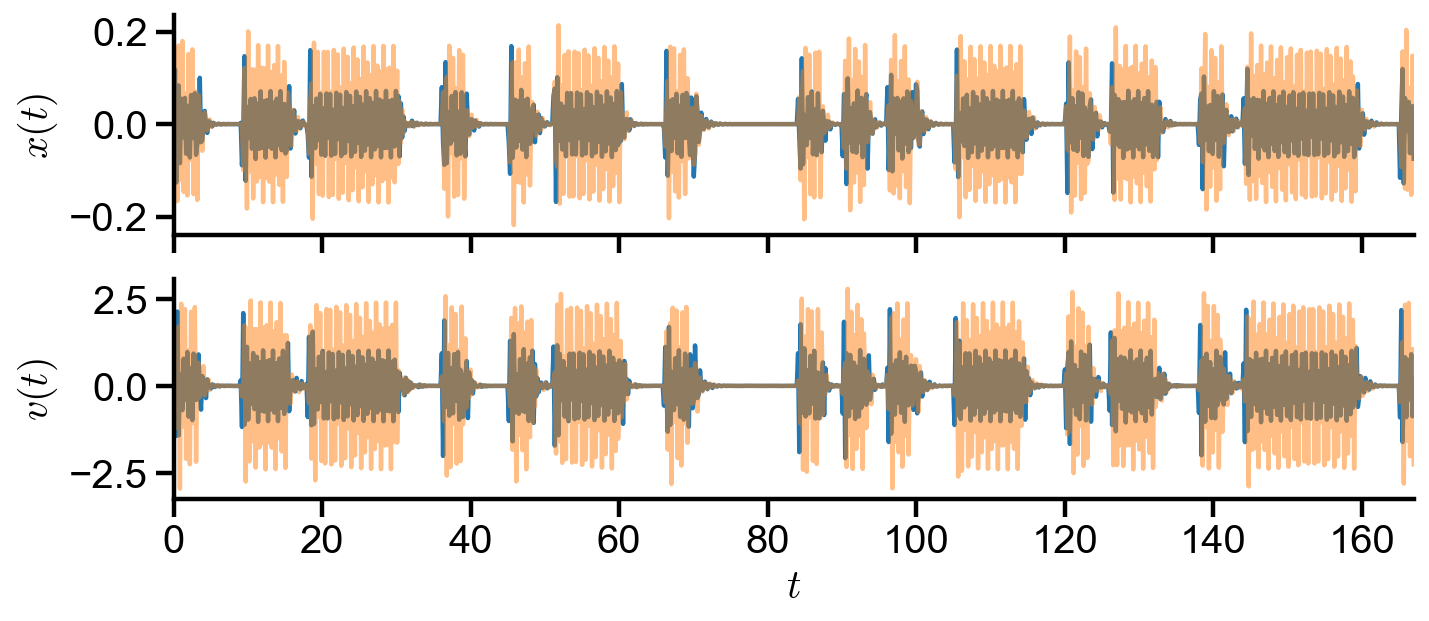

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
axs[0].plot(t, x1, label='$x_1(t)$', alpha=1)
axs[0].plot(t, x2, label='$x_2(t)$', alpha=0.5)
axs[0].set_ylabel('$x(t)$')
# axs[0].set_ylim(0.5, 2.5)

axs[1].plot(t, v1, label='$v_1(t)$', alpha=1)
axs[1].plot(t, v2, label='$v_2(t)$', alpha=0.5)
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$v(t)$')
# axs[1].set_ylim(-3.5, 3.5)

for i in range(2):
    axs[i].set_xlim(t_initial, t_final)
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref

In [25]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation()  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')